# Analysis of IMDb Top 1,000 Movies

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### <div class="alert-warning">Data Source: https://www.kaggle.com/datasets/ramjasmaurya/top-250s-in-imdb</div>

In [164]:
df = pd.read_csv('imdb (1000 movies) in june 2022.csv', index_col=0)
df.head(1)

,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
ranking of movie,,,,,,,,,,,,,,,
1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M


## Data Cleaning

In [165]:
#normalize column names
df.columns.values[[0,7,8,9,10,-1]] = ['name','details','director','actor 1','actor 2','gross']
df.columns = df.columns.str.lower()
df.index.name = 'IMDb ranking'

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1,000.00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1000 non-null   object 
 1   year         1000 non-null   object 
 2   certificate  995 non-null    object 
 3   runtime      1000 non-null   object 
 4   genre        1000 non-null   object 
 5   rating       1000 non-null   float64
 6   metascore    837 non-null    float64
 7   details      1000 non-null   object 
 8   director     1000 non-null   object 
 9   actor 1      1000 non-null   object 
 10  actor 2      1000 non-null   object 
 11  actor 3      1000 non-null   object 
 12  actor 4      1000 non-null   object 
 13  votes        1000 non-null   object 
 14  gross        820 non-null    object 
dtypes: float64(2), object(13)
memory usage: 125.0+ KB


In [167]:
df.year.value_counts().sort_index()

(I) (1985)     1
(I) (1995)     1
(I) (2001)     1
(I) (2004)     3
(I) (2007)     1
              ..
-2018         19
-2019         24
-2020          7
-2021         10
-2022          5
Name: year, Length: 121, dtype: int64

In [168]:
#remove dashes from year
df.year = df.year.str[1:]
#convert year column to string
df['year'] = df['year'].astype('string')
#remove parentheses and roman numerals from year column
rowstofix = df[df.year.str.endswith(")")].index.values
for a in rowstofix:
    df.year[int(a)-1] = df.year[int(a)-1][-5:-1]
#convert year column to int
df['year'] = df['year'].astype('int')

In [169]:
#change NaNs in certificate column to 'Not Rated'
df['certificate'] = df['certificate'].replace(np.nan,'Not Rated')

In [170]:
#remove 'min' from runtime column
df.runtime = df.runtime.str[:-4]
#convert runtime column to int
df['runtime'] = df['runtime'].astype(int)

In [171]:
#replace NaNs with zeroes in metascore column
df['metascore'] = df['metascore'].replace(np.nan, 0)

In [172]:
#remove commas from votes column
df['votes'] = df['votes'].str.replace(",","")
#convert votes column to int
df['votes'] = df['votes'].astype('int')

In [173]:
#remove $ and M from gross column
df['gross'] = df.gross.str[1:-1]
#convert gross column to float
df['gross'] = df['gross'].astype('float')
#change NaNs in gross column to zeroes
df['gross'] = df['gross'].replace(np.nan, 0)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1,000.00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1000 non-null   object 
 1   year         1000 non-null   int64  
 2   certificate  1000 non-null   object 
 3   runtime      1000 non-null   int64  
 4   genre        1000 non-null   object 
 5   rating       1000 non-null   float64
 6   metascore    1000 non-null   float64
 7   details      1000 non-null   object 
 8   director     1000 non-null   object 
 9   actor 1      1000 non-null   object 
 10  actor 2      1000 non-null   object 
 11  actor 3      1000 non-null   object 
 12  actor 4      1000 non-null   object 
 13  votes        1000 non-null   int64  
 14  gross        1000 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 157.3+ KB


In [175]:
df.head(1)

,name,year,certificate,runtime,genre,rating,metascore,details,director,actor 1,actor 2,actor 3,actor 4,votes,gross
IMDb ranking,,,,,,,,,,,,,,,
1,The Shawshank Redemption,1994,15,142,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2603314,28.34


## Data Visualization

### Distribution of movies by rating

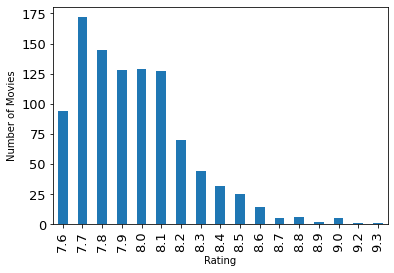

In [179]:
df['rating'].value_counts().sort_index().plot(kind='bar', ylabel='Number of Movies', xlabel='Rating', fontsize=13)
plt.show()

In [181]:
df['rating'].mean()

7.9601999999999995

#### We can see that although the #1 movie (The Shawshank Redemption) has a rating of 9.3, this is an abnormally high rating. Most movies from IMDb's Top 1,000 have a rating between 7.6 - 8.1. The overall mean rating is 7.96

### Distribution of movies by year

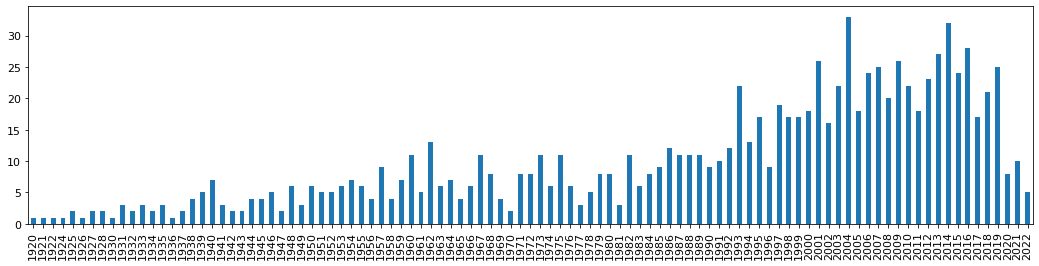

In [183]:
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(18,4), fontsize=11)
plt.show()

#### We can see that most of the movies in IMDb's Top 1,000 are from the 1990s, 2000s, and 2010s

### Distribution of movies by content rating

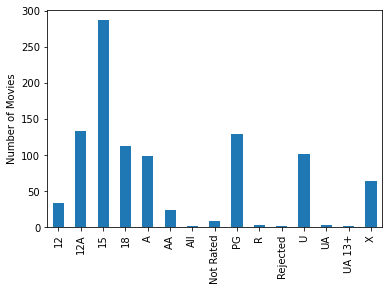

In [182]:
df['certificate'].value_counts().sort_index().plot(kind='bar', ylabel='Number of Movies')
plt.show()

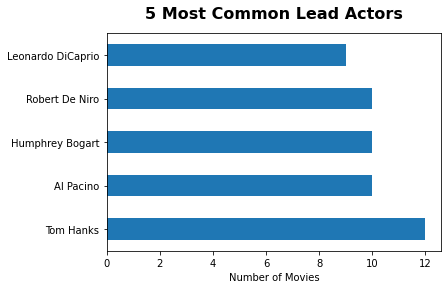

In [6]:
top_5_actors = df['actor 1'].value_counts().head(5)
top_5_actors.plot(kind="barh")
plt.title("5 Most Common Lead Actors", pad=15, weight='bold', size=16)
plt.xlabel("Number of Movies")
plt.show()

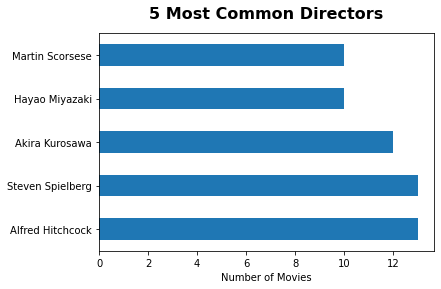

In [7]:
top_5_directors = df['director'].value_counts().head(5)
top_5_directors.plot(kind="barh")
plt.title("5 Most Common Directors", pad=15, weight='bold', size=16)
plt.xlabel("Number of Movies")
plt.show()

### Top 5 Highest Domestic Earnings (in millions)

In [8]:
df[["name","rating","gross"]].sort_values(by='gross', ascending=False).head(5)

,name,rating,gross
IMDb ranking,,,
610,Star Wars: Episode VII - The Force Awakens,7.8,936.66
66,Avengers: Endgame,8.4,858.37
100,Spider-Man: No Way Home,8.3,804.75
644,Avatar,7.8,760.51
67,Avengers: Infinity War,8.4,678.82


In [178]:
(df['gross']==0).value_counts()[1]

183

#### It is worth noting that there are 183 movies in the list without gross domestic earnings data. If gross earnings was the focus of this project, we could figure out the IMDb ID number for each of these movies and use those ID numbers to obtain earnings data from IMDb affiliate site BoxOfficeMojo.

### Movie with the longest runtime

In [10]:
df[df['runtime']==df['runtime'].max()]

,name,year,certificate,runtime,genre,rating,metascore,details,director,actor 1,actor 2,actor 3,actor 4,votes,gross
IMDb ranking,,,,,,,,,,,,,,,
148,Gangs of Wasseypur,2012,18,321,"Action, Comedy, Crime",8.2,89.0,A clash between Sultan and Shahid Khan leads t...,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui,Tigmanshu Dhulia,94201,NaN


### Movie with the shortest runtime

In [11]:
df[df['runtime']==df['runtime'].min()]

,name,year,certificate,runtime,genre,rating,metascore,details,director,actor 1,actor 2,actor 3,actor 4,votes,gross
IMDb ranking,,,,,,,,,,,,,,,
205,Sherlock Jr.,1924,U,45,"Action, Comedy, Romance",8.2,NaN,"A film projectionist longs to be a detective, ...",Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,48922,0.98


### Average runtime

In [12]:
df['runtime'].mean()

123.637

### Most common genre tags

In [42]:
df['genre'].value_counts().head(10)

Drama                           84
Drama, Romance                  37
Comedy, Drama                   34
Comedy, Drama, Romance          34
Action, Crime, Drama            32
Crime, Drama                    30
Animation, Adventure, Comedy    30
Crime, Drama, Mystery           29
Crime, Drama, Thriller          26
Biography, Drama, History       25
Name: genre, dtype: int64

### Total number of movies tagged as....

In [15]:
for a in ['Drama','Romance','Comedy','Action','Crime','Thriller','Animation','Adventure','History','Biography']:
    print(a,"-",len(df[df['genre'].str.contains(a)]))

Drama - 730
Romance - 127
Comedy - 237
Action - 200
Crime - 207
Thriller - 131
Animation - 83
Adventure - 190
History - 51
Biography - 107


#### We can see that 73% of IMDb's Top 1,000 movies have the "Drama" tag